In [1]:
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import numpy as np
import math
import scipy.ndimage as ndimage  
from skimage import feature
from skimage import filters, io
import cv2

# 1. Calculate Image gradient of tiger image (20 points)

- read and show the tiger image
- show the gradient of x and y, respectively

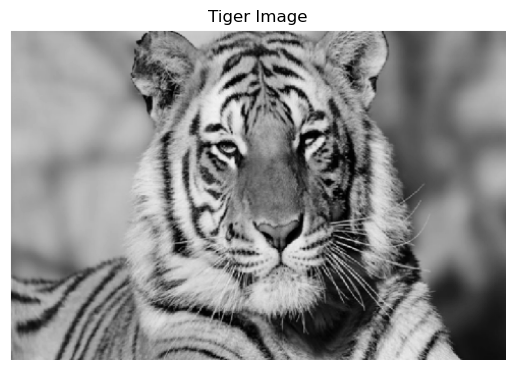

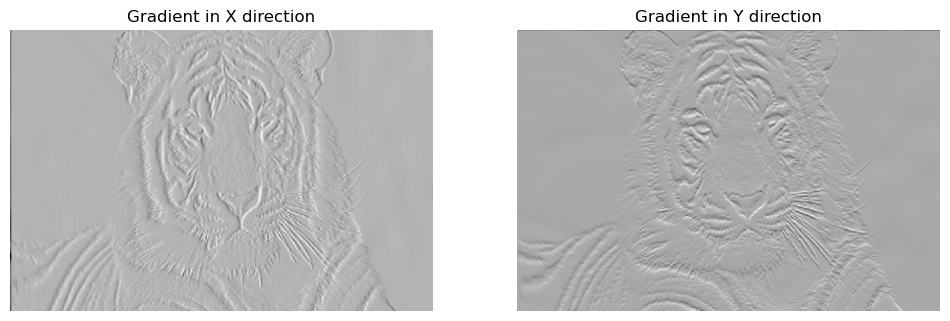

In [2]:
tiger_image = Image.open('/Users/mallikayeturi/Downloads/Assignment_week4/tiger.png').convert('L') 

# The tiger image
plt.imshow(tiger_image, cmap='gray')
plt.title('Tiger Image')
plt.axis('off')
plt.show()

tiger_array = np.array(tiger_image)

# Calculate gradient in x and y directions
gradient_x = np.gradient(tiger_array, axis=1)
gradient_y = np.gradient(tiger_array, axis=0)

# Display the gradients
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.imshow(gradient_x, cmap='gray')
plt.title('Gradient in X direction')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gradient_y, cmap='gray')
plt.title('Gradient in Y direction')
plt.axis('off')

# Results
plt.show()


# 2. Implement Sobel edge detection of bird image (30 points)

- read and show the bird image
- show the gradient of x and y, respectively
- show gradient magnitude
- show results of different thresholds


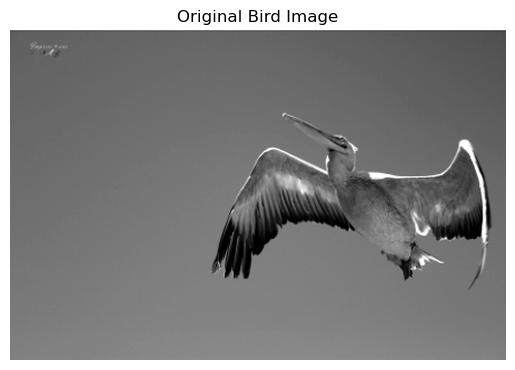

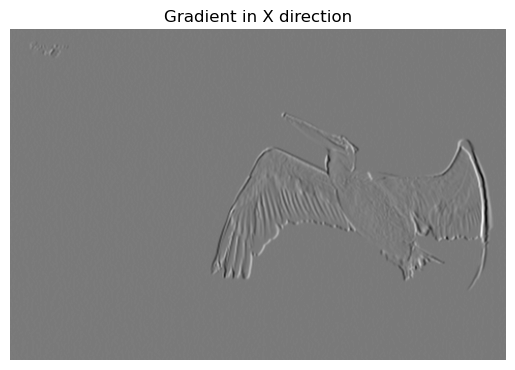

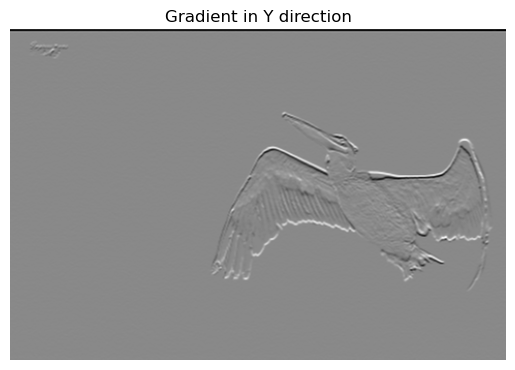

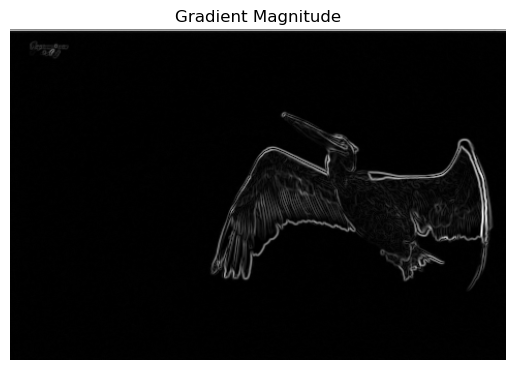

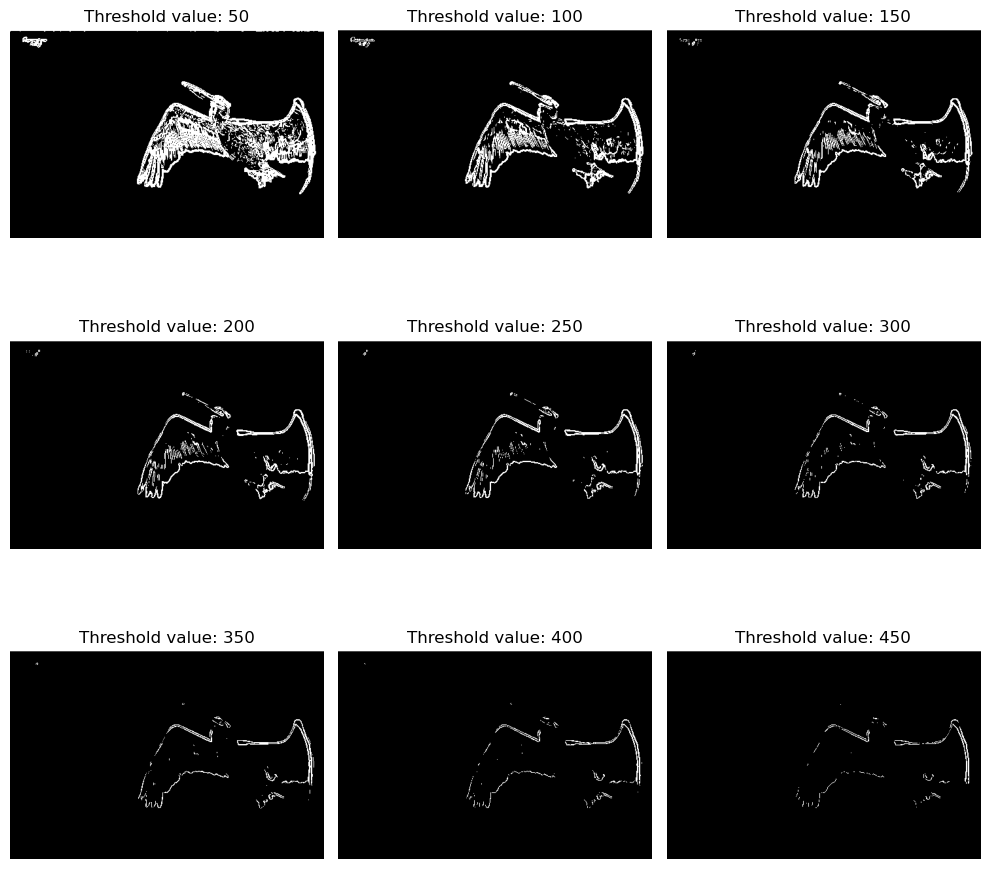

In [3]:
def read_and_resize(image_path, size):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize(size, Image.LANCZOS)      # Resize the image
    return np.array(img, dtype=np.float64)

def display_image(img, title, cmap='gray'):
    plt.figure()
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load and display the bird image
img_bird = read_and_resize('/Users/mallikayeturi/Downloads/Assignment_week4/bird.png', (480, 320))
display_image(img_bird, 'Original Bird Image')

# Sobel filter for gradient calculation
gradient_x = ndimage.sobel(img_bird, axis=1)  # Gradient in X direction
gradient_y = ndimage.sobel(img_bird, axis=0)  # Gradient in Y direction

# Display the gradients in X and Y directions
display_image(gradient_x, 'Gradient in X direction')
display_image(gradient_y, 'Gradient in Y direction')

# Calculate the gradient magnitude and direction
gradient_magnitude = np.hypot(gradient_x, gradient_y)
gradient_direction = np.arctan2(gradient_y, gradient_x) * 180 / np.pi 

# Display the gradient magnitude
display_image(gradient_magnitude, 'Gradient Magnitude')

# Thresholding and displaying binary images for different thresholds
plt.figure(figsize=(10, 10))
for i, threshold in enumerate(range(50, 500, 50), 1):
    binary_image = gradient_magnitude > threshold
    plt.subplot(3, 3, i)
    plt.imshow(binary_image, cmap='gray')
    plt.title(f'Threshold value: {threshold}')
    plt.axis('off')

# Results
plt.tight_layout()
plt.show()


# 3. Implement LOG edge detection of bird image (20 points)

- read and show the bird image
- show results of LOG edge detection

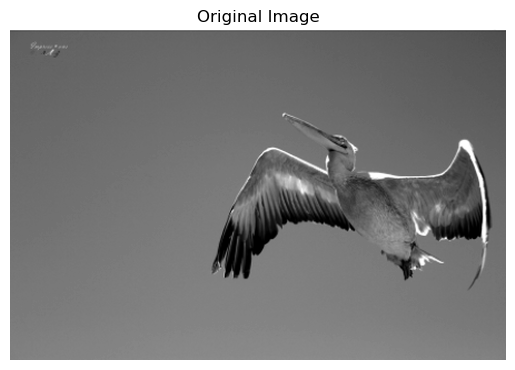

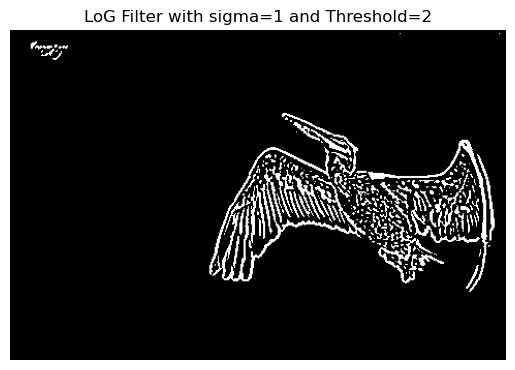

In [4]:
def read_and_resize(image_path, size):
    img = Image.open(image_path).convert('L')  # Convert image to grayscale
    img = img.resize(size, Image.LANCZOS)      # Resize the image
    return np.array(img, dtype=np.float64)

def display_image(img, title, cmap='gray'):
    plt.figure()
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to create a Laplacian of Gaussian (LoG) filter
def create_log_filter(size, sigma):
    ax = np.arange(-size // 2 + 1., size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    norm = (xx**2 + yy**2) / (2.0 * sigma**2)
    log_filter = (1 - norm) * np.exp(-norm) / (np.pi * sigma**4)
    return log_filter - log_filter.mean()

# Load and display the bird image
img_bird = read_and_resize('bird.png', (480, 320))
display_image(img_bird, 'Original Image')

# Create a 7x7 LoG filter with sigma=1
log_filter = create_log_filter(7, 1)

# Apply the LoG filter to the image
filtered_image = ndimage.convolve(img_bird, log_filter)

# Apply a threshold to the filtered image
binary_image = filtered_image > 2

# Display the binary image
display_image(binary_image, 'LoG Filter with sigma=1 and Threshold=2')


# 4. Implement Canny edge detection of bird image (20 points)

- show results of Canny edge detection

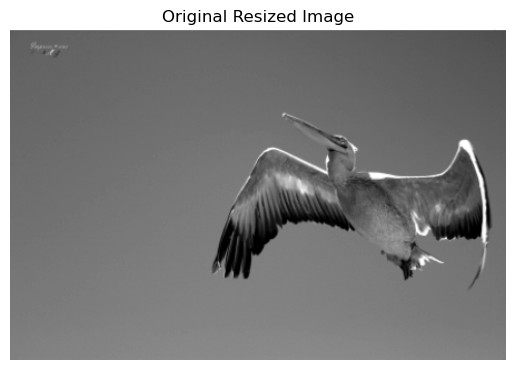

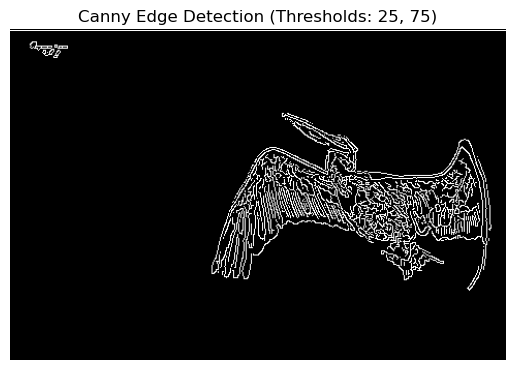

In [5]:
def display_image(img, title, cmap='gray'):
    plt.figure()
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Read the bird image using OpenCV
img = cv2.imread('/Users/mallikayeturi/Downloads/Assignment_week4/bird.png')

# Convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize the image
img_resized = cv2.resize(img_gray, (480, 320))

# Display the resized grayscale image
display_image(img_resized, 'Original Resized Image')

# Perform Canny edge detection
edges = cv2.Canny(img_resized, 25, 75)

# Display the results of the Canny edge detection
display_image(edges, 'Canny Edge Detection (Thresholds: 25, 75)')


# 5. Given Gaussian function: $g(x,y) = \frac{1}{\sqrt{2\pi}\sigma} e^{(-\frac{x^2 + y^2}{2\sigma^2})}$ , calculate $\frac{\partial^2 g}{\partial x^2} + \frac{\partial^2 g}{\partial y^2}$ 
# (10 points)

(You can search for how to use LaTex to write equations if you don't know how to write.)

### Task 5: Laplacian of the Gaussian Function - Full Derivation

We are given the following Gaussian function:

$$
g(x, y) = \frac{1}{\sqrt{2\pi\sigma}} e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

We need to calculate the sum of the second-order partial derivatives:

$$
\frac{\partial^2 g}{\partial x^2} + \frac{\partial^2 g}{\partial y^2}
$$

#### Step 1: First Derivatives

We begin by computing the first partial derivatives of \(g(x, y)\) with respect to \(x\) and \(y\).

##### First Derivative with Respect to \(x\):

Using the chain rule on the exponential term:

$$
\frac{\partial g}{\partial x} = \frac{1}{\sqrt{2\pi\sigma}} \cdot \left( -\frac{x}{\sigma^2} \right) e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

Simplifying:

$$
\frac{\partial g}{\partial x} = -\frac{x}{\sigma^2} \cdot g(x, y)
$$

##### First Derivative with Respect to \(y\):

Similarly, for \(y\):

$$
\frac{\partial g}{\partial y} = -\frac{y}{\sigma^2} \cdot g(x, y)
$$

#### Step 2: Second Derivatives

Now, we compute the second-order partial derivatives with respect to \(x\) and \(y\).

##### Second Derivative with Respect to \(x\):

Using the product rule, we differentiate the first derivative with respect to \(x\) again:

$$
\frac{\partial^2 g}{\partial x^2} = \frac{\partial}{\partial x} \left( -\frac{x}{\sigma^2} \cdot g(x, y) \right)
$$

Applying the product rule:

$$
\frac{\partial^2 g}{\partial x^2} = -\frac{1}{\sigma^2} g(x, y) + \frac{x^2}{\sigma^4} g(x, y)
$$

Simplifying:

$$
\frac{\partial^2 g}{\partial x^2} = g(x, y) \left( \frac{x^2}{\sigma^4} - \frac{1}{\sigma^2} \right)
$$

##### Second Derivative with Respect to \(y\):

Similarly for \(y\):

$$
\frac{\partial^2 g}{\partial y^2} = g(x, y) \left( \frac{y^2}{\sigma^4} - \frac{1}{\sigma^2} \right)
$$

#### Step 3: Laplacian of the Gaussian

The Laplacian is the sum of the second-order partial derivatives with respect to \(x\) and \(y\):

$$
\frac{\partial^2 g}{\partial x^2} + \frac{\partial^2 g}{\partial y^2} = g(x, y) \left( \frac{x^2}{\sigma^4} - \frac{1}{\sigma^2} \right) + g(x, y) \left( \frac{y^2}{\sigma^4} - \frac{1}{\sigma^2} \right)
$$

Factoring out \(g(x, y)\):

$$
\frac{\partial^2 g}{\partial x^2} + \frac{\partial^2 g}{\partial y^2} = g(x, y) \left( \frac{x^2 + y^2}{\sigma^4} - \frac{2}{\sigma^2} \right)
$$

#### Step 4: Substituting the Gaussian Function

Substitute the original Gaussian function \(g(x, y)\) back into the expression:

$$
g(x, y) = \frac{1}{\sqrt{2\pi\sigma}} e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

This gives:

$$
\frac{\partial^2 g}{\partial x^2} + \frac{\partial^2 g}{\partial y^2} = \frac{1}{\sqrt{2\pi\sigma}} e^{-\frac{x^2 + y^2}{2\sigma^2}} \left( \frac{x^2 + y^2}{\sigma^4} - \frac{2}{\sigma^2} \right)
$$

